In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
big_mart_data= pd.read_csv('big_mart.csv')

In [3]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
big_mart_data.shape

(8523, 12)

In [5]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
big_mart_data['Item_Weight'].mean()

12.857645184136183

In [8]:
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

In [9]:
mode_of_outlet_size= big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [10]:
missing_values = big_mart_data['Outlet_Size'].isnull()
big_mart_data.loc[missing_values ,'Outlet_Size']= big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x : mode_of_outlet_size)

In [11]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
sns.set()

<Figure size 432x432 with 0 Axes>

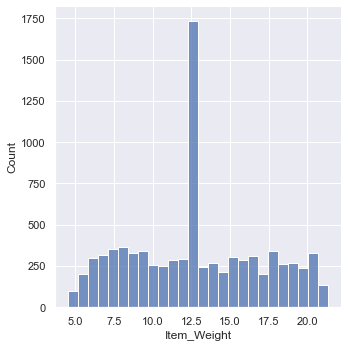

In [14]:
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Weight'])
plt.show()

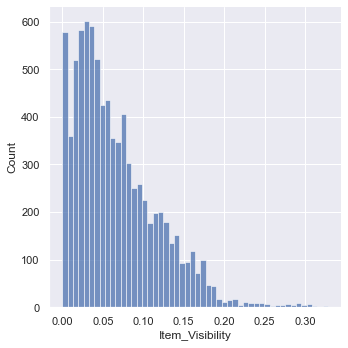

In [15]:
sns.displot(big_mart_data['Item_Visibility'])
plt.show()

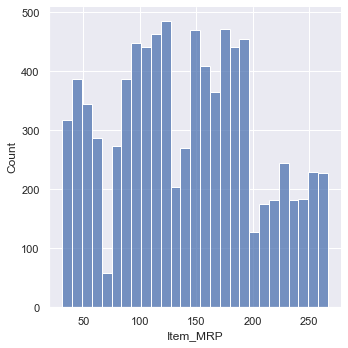

In [16]:
sns.displot(big_mart_data['Item_MRP'])
plt.show()

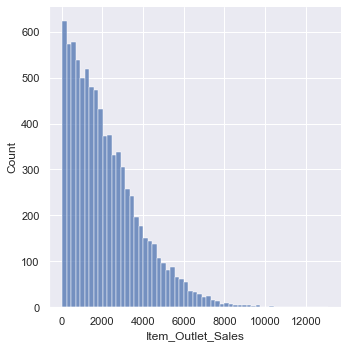

In [17]:
sns.displot(big_mart_data['Item_Outlet_Sales'])
plt.show()

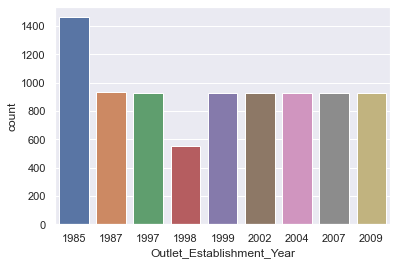

In [18]:
sns.countplot(x='Outlet_Establishment_Year', data = big_mart_data)
plt.show()

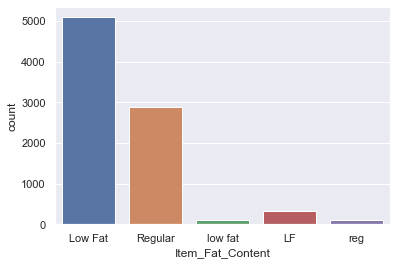

In [19]:
sns.countplot(x='Item_Fat_Content', data = big_mart_data)
plt.show()

In [20]:
big_mart_data.replace({'Item_Fat_Content': {'low fat' : 'Low Fat','LF' : 'Low Fat', 'reg': 'Regular'}},inplace=True)
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
encoder = LabelEncoder()
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

In [43]:
big_mart_data= big_mart_data.drop(['Outlet_Size', 'Outlet_Location_Type'],axis=1)
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,1,994.7052


In [44]:
X=big_mart_data.drop(columns ='Item_Outlet_Sales',axis=1)
Y=big_mart_data['Item_Outlet_Sales']

In [55]:
X_train,X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(8523, 9) (5966, 9) (2557, 9)


In [56]:
regressor= XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [57]:
training_data_prediction =regressor.predict(X_train)

In [58]:
r2_train= metrics.r2_score(Y_train, training_data_prediction)
print("R square test", r2_train)

R square test 0.8686725463186216


In [59]:
test_data_prediction = regressor.predict(X_test)
r2_test= metrics.r2_score(Y_test, test_data_prediction)
print("R square test", r2_test)

R square test 0.5495571855349362
